In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./data/Vehicle_Price_Cleaned_prepared.csv")

In [3]:
df.head()

,make,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
0,Jeep,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,1
1,Jeep,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,1
2,GMC,96410.0,Otro,8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Otro,Four-wheel Drive,1
3,Dodge,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,2
4,RAM,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            950 non-null    object 
 1   price           950 non-null    float64
 2   engine          950 non-null    object 
 3   cylinders       950 non-null    float64
 4   fuel            950 non-null    object 
 5   mileage         950 non-null    float64
 6   transmission    950 non-null    object 
 7   trim            950 non-null    object 
 8   body            950 non-null    object 
 9   doors           950 non-null    float64
 10  exterior_color  950 non-null    object 
 11  interior_color  950 non-null    object 
 12  drivetrain      950 non-null    object 
 13  years_old       950 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 104.0+ KB


In [5]:
target = "price"

<Axes: xlabel='price', ylabel='Count'>

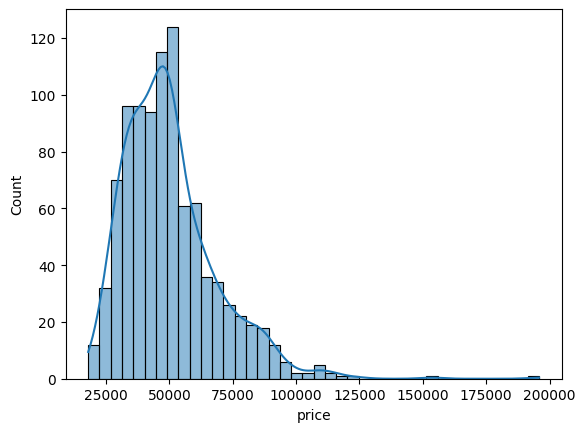

In [6]:
sns.histplot(x= "price", data = df, kde = True)

In [8]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify= df.make, random_state= 42)

In [10]:
variables_cat = ['make',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
train_set[variables_cat] = encoder.fit_transform(train_set[variables_cat])

In [12]:
test_set[variables_cat] = encoder.transform(test_set[variables_cat])

In [13]:
features = train_set.columns.to_list()
features.remove(target)
scaler = StandardScaler()
X_train = train_set[features]
y_train = train_set[target]
y_log_train = train_set[target].apply(np.log)
X_test = test_set[features]
y_test = test_set[target]
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

model_names = ["Regresion Lineal","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LinearRegression()
tree_clf = DecisionTreeRegressor(random_state= 42)
rf_clf = RandomForestRegressor(random_state= 42)
xgb_clf = XGBRegressor(random_state = 42)
lgb_clf = LGBMRegressor(random_state= 42, verbose = -100)
cat_clf = CatBoostRegressor(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

In [15]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Regresion Lineal":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "neg_mean_squared_error")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LinearRegression()
DecisionTreeRegressor(random_state=42)
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
LGBMRegressor(random_state=42, verbose=-100)


In [16]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <Regresion Lineal>, RMSE_CV: 16887.239357300572
Model <DecisionTree>, RMSE_CV: 12128.432757916671
Model <Random Forest>, RMSE_CV: 10005.95418558289
Model <XGBoost>, RMSE_CV: 10340.319217025713
Model <LightGBM>, RMSE_CV: 10005.117150663187
Model <CatBoost>, RMSE_CV: 9758.851105643676
El ganador es CatBoost


In [17]:
params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    #"min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid= params_grid,
                       cv = 5,
                       scoring = "neg_mean_squared_error",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.3, 0.6, 1],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_squared_error')

In [18]:
np.sqrt(-rf_grid.best_score_)

np.float64(9637.382021124318)

In [19]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_samples': 0.6,
 'n_estimators': 400}

In [20]:
y_pred = rf_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 5122.0027897607415
MAPE: 0.0978696267927342
RMSE: 8360.355087233984


In [21]:
metricas_optimizadas = {}

In [22]:
### Linear Regresion
from sklearn.linear_model import ElasticNet

param_grid = {
    "alpha": [0.1, 1, 10, 100],
    "l1_ratio": [0.2,0.4,0.6,1]

} 
model = ElasticNet()
lr_grid = RandomizedSearchCV( model,
                             cv = 3, 
                             n_iter = 20,
                             param_distributions= param_grid,
                             scoring= "neg_mean_squared_error"
)

lr_grid.fit(X_train_scaled,y_train)
print("LR best_score:", np.sqrt(-lr_grid.best_score_))
metricas_optimizadas["Linear Regresion"] = np.sqrt(-lr_grid.best_score_)

c:\Users\luis_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LR best_score: 16772.38371811579


In [23]:
### DecisionTrees

tree_clf = DecisionTreeRegressor()

param_grid = {
    "max_depth": [1,2,4,8,None],
    "min_samples_leaf": [1,5,10,20],
    "max_features": ["sqrt","log2", None]
}

tree_grid = RandomizedSearchCV(tree_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")

tree_grid.fit(X_train,y_train)
print("Tree best_score:", np.sqrt(-tree_grid.best_score_))
metricas_optimizadas["Tree"] = np.sqrt(-tree_grid.best_score_)

Tree best_score: 12043.036726492453


In [24]:
### RandomForest

rf_clf = RandomForestRegressor()

params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = RandomizedSearchCV(rf_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


rf_grid.fit(X_train, y_train)
print("RF best_score:", np.sqrt(-rf_grid.best_score_))
metricas_optimizadas["RandomForest"] = np.sqrt(-rf_grid.best_score_)

RF best_score: 9724.433966069337


In [25]:
### XGBoost

xgb_clf = XGBRegressor()

param_grid = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.2, 0.6, 0.9],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          }

xgb_grid = RandomizedSearchCV(xgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


xgb_grid.fit(X_train, y_train)
print("XGB best_score:", np.sqrt(-xgb_grid.best_score_))
metricas_optimizadas["XGBoost"] = np.sqrt(-xgb_grid.best_score_)

XGB best_score: 10002.15530558792


In [26]:
### LightGBM 


lgb_clf = LGBMRegressor(verbose = -100)

param_grid= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

lgb_grid = RandomizedSearchCV(lgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


lgb_grid.fit(X_train, y_train)
print("LGB best_score:", np.sqrt(-lgb_grid.best_score_))
metricas_optimizadas["LightGBM"] = np.sqrt(-lgb_grid.best_score_)

LGB best_score: 9693.895669392397


In [27]:
### CatBoost

cat_clf = CatBoostRegressor(verbose = False)

param_grid= {'depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          #'bagging_fraction': [0.3,0.6,1], No hay hiperparámetro equivalente
          'colsample_bylevel': [0.5,1],
          'iterations': [100, 250, 500, 750],
          "border_count": [125,250]
          }


cat_grid = RandomizedSearchCV(cat_clf, 
                               cv = 3,
                               n_iter = 3,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


cat_grid.fit(X_train, y_train)
print("CatBoost best_score:", np.sqrt(-cat_grid.best_score_))
metricas_optimizadas["CatBoost"] = np.sqrt(-cat_grid.best_score_)

CatBoost best_score: 10113.267352085877


In [28]:
def describe_df(df_in):

    '''
    Esta función obtiene para las variables de un dataset el tipo de datos que contienen, su porcentaje de nulos, sus valores únicos y su cardinalidad.

    
    Argumentos:
    
    df_in (pd.DataFrame): dataset en formato DataFrame para obtener los datos mencionados.

    
    Retorna:

    pd.DataFrame: un DataFrame cuyas columnas son las mismas que las del DataFrame que se pasa como argumento y cuyas filas son los datos que se proporciona sobre las variables, a saber: tipo de datos que contienen, porcentaje de nulos, valores únicos y cardinalidad.
    '''

    data_type = [df_in[col].dtype for col in df_in.columns]
    missings = [df_in[col].isna().value_counts(normalize = True)[True] if True in df_in[col].isna().value_counts().index else 0.0 for col in df_in.columns ]
    cardinalidad = [df_in[col].nunique() for col in df_in.columns]
    cardinalidad_por = [df_in[col].nunique()/len(df_in[col]) for col in df_in.columns]
    dict_df = {"DATA_TYPE": data_type, "MISSINGS (%)": missings, "UNIQUE_VALUES": cardinalidad, "CARDIN (%)": cardinalidad_por}
    nuevo_df = pd.DataFrame(dict_df, df_in.columns)
    return nuevo_df.T

In [29]:
describe_df(df)

,make,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
DATA_TYPE,object,float64,object,float64,object,float64,object,object,object,float64,object,object,object,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,22,817,39,5,6,94,13,57,7,4,51,16,4,3
CARDIN (%),0.023158,0.86,0.041053,0.005263,0.006316,0.098947,0.013684,0.06,0.007368,0.004211,0.053684,0.016842,0.004211,0.003158


In [30]:
describe_df(train_set)

,make,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,22,661,39,5,6,79,13,57,7,4,51,16,4,3
CARDIN (%),0.028947,0.869737,0.051316,0.006579,0.007895,0.103947,0.017105,0.075,0.009211,0.005263,0.067105,0.021053,0.005263,0.003947


In [31]:
def agrupar_raros(df, col, umbral=0.01):
    freqs = df[col].value_counts(normalize=True)
    raros = freqs[freqs < umbral].index
    df[col] = df[col].replace(raros, "Otro")

In [32]:
df.describe()

,price,cylinders,mileage,doors,years_old
count,950.000000,950.000000,950.000000,950.000000,950.000000
mean,50111.151248,4.485263,71.609500,3.952632,1.087368
std,18494.081811,1.991365,511.953838,0.277100,0.300594
min,17994.000000,0.000000,0.000000,2.000000,0.000000
25%,36753.000000,4.000000,4.000000,4.000000,1.000000
50%,47280.000000,4.000000,9.000000,4.000000,1.000000
75%,58836.250000,6.000000,14.000000,4.000000,1.000000
max,195895.000000,8.000000,9711.000000,5.000000,2.000000


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [36]:
resultados = []
modelos = {"Regresion Lineal":lr_grid,"DecisionTree":tree_grid,"Random Forest":rf_grid,"XGBoost":xgb_grid,"LightGBM":lgb_grid,"CatBoost":cat_grid}

for nombre, modelo in modelos.items():
    
    pred = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    resultados.append({
        "Modelo": nombre,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 3)
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados).sort_values("RMSE")
print(df_resultados)

             Modelo        MAE        RMSE        R²
5          CatBoost    5009.14     7771.60     0.814
3           XGBoost    4452.97     7954.00     0.805
2     Random Forest    4611.70     7956.00     0.805
4          LightGBM    5065.15     8168.12     0.795
1      DecisionTree    6922.35    11007.93     0.627
0  Regresion Lineal  266823.94  1041908.76 -3338.987


C:\Users\luis_\AppData\Local\Temp\ipykernel_15376\1404434080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Modelo", data=df_resultados, palette="viridis")


<Axes: xlabel='RMSE', ylabel='Modelo'>

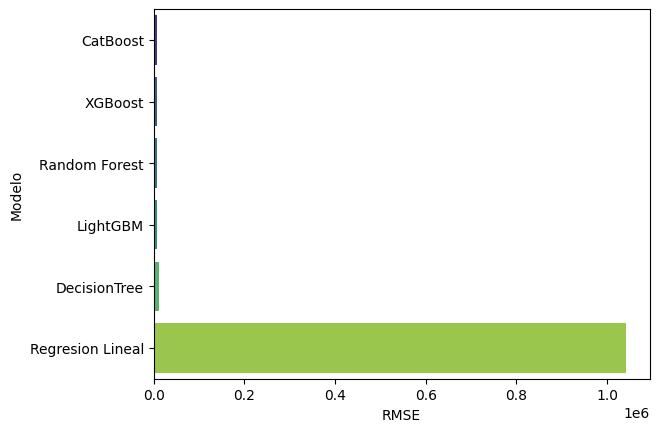

In [37]:
sns.barplot(x="RMSE", y="Modelo", data=df_resultados, palette="viridis")

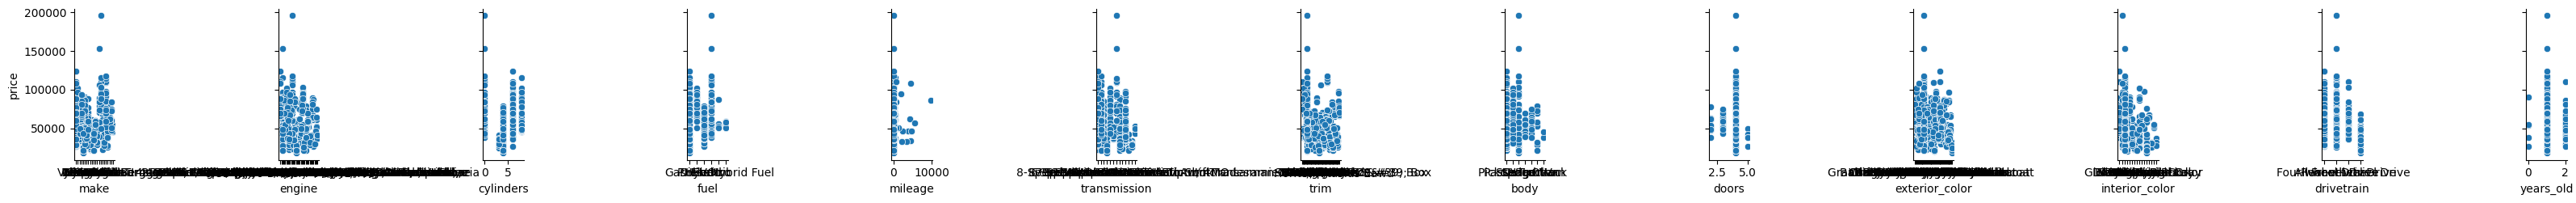

In [39]:
sns.pairplot(df, x_vars=features, y_vars=[target])

In [40]:
df.price.describe()

count       950.000000
mean      50111.151248
std       18494.081811
min       17994.000000
25%       36753.000000
50%       47280.000000
75%       58836.250000
max      195895.000000
Name: price, dtype: float64